# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()

In [3]:
# Create class names - not included with dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Look at data structure

To avoid data snooping bias, we shouldn't look too deep here. Only once we have separated our data into training and test sets will we look deeper.

See the length of the dataset. It's a tuple with a length of two. From the documentation, I know this is from training and test sets.

In [54]:
print(type(fashion_mnist))
print(len(fashion_mnist))

<class 'tuple'>
2


## Unpacking into training and test sets

Unpacking this into training and test data, so it's easier to look at the structure. I can see these are further tuples with length of two. Documentation tells me these are the images and the labels.

In [63]:
train_data, test_data = fashion_mnist

print(type(train_data), len(train_data))
print(type(test_data), len(test_data))

<class 'tuple'> 2
<class 'tuple'> 2


Separating these tuples out into images and labels. But for convenience sake, I've kept it as *\_data.

In [64]:
train_data, train_labels = train_data
test_data, test_labels = test_data

print(type(train_data), len(train_data))
print(type(test_data), len(test_data))

<class 'numpy.ndarray'> 60000
<class 'numpy.ndarray'> 10000


This also could have been done in one step. I've also added the preprocessing code in here. But this couldn't have been done without exploring and rescaling the data (which is further below). This is good to note if I was going in blind.

In [4]:
# Unpack
(train_data, train_labels), (test_data, test_labels) = fashion_mnist

print(type(train_data), len(train_data))
print(type(test_data), len(test_data))

# Rescale
train_data, test_data = train_data / 255.0, test_data / 255.0

<class 'numpy.ndarray'> 60000
<class 'numpy.ndarray'> 10000


## Data structure

Look at shape of training dataset. Can see there are 60,000 images in training dataset. They are 28 by 28 pixels.

In [19]:
train_data.shape

(60000, 28, 28)

Look at training data labels.

In [21]:
print(train_labels)
print(train_labels.shape)
print(len(train_labels)) # This line suggested by tutorial

[9 0 0 ... 3 0 5]
(60000,)
60000


Looking at test dataset. There are 10,000 images in my test dataset.

In [27]:
test_data.shape

(10000, 28, 28)

Looking at test data labels.

In [28]:
len(test_labels)

10000

# Exploring and processing the data

Get a bit more depth and understand my training data. If we want to make a copy so it's easier to manipulate, can do so with: train_data_original = train_data.copy() and train_labels_original = train_labels.copy()

## Visualising the training data

Looking at the first image in my training set.

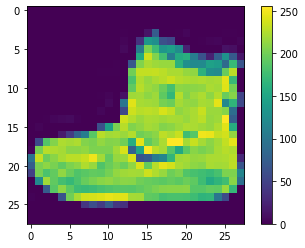

In [34]:
plt.imshow(train_data[0])
plt.colorbar()

The values are from 0 to 255 pixels, so I need to scale them so they're between 0 and 1 before feeding them into the neural network. Can just divide by 255 to scale them. Do this for both training and test set. Must be done in the same way.

In [68]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Plotting the first 25 images from the training dataset to make sure they're in the right format.

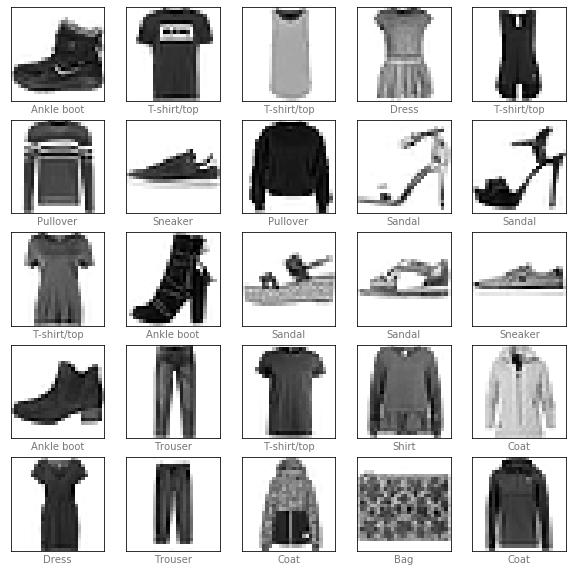

In [77]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i], cmap=plt.cm.binary) # cm.binary for black and white
    plt.xlabel(class_names[train_labels[i]], color="#777777")